## Credit Card Kaggle Anamoly Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [1]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [11]:
df.corrwith(df['Class']).sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
dtype: float64

### Visualizing Dataset

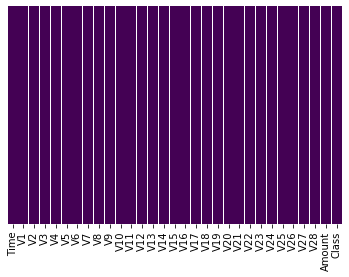

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
count_classes=pd.value_counts(df['Class'],sort=True)

Text(0, 0.5, 'Frequency')

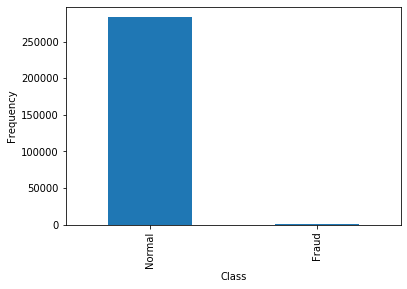

In [13]:
count_classes.plot(kind = 'bar')
plt.xticks(range(2),["Normal","Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [14]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [15]:
fraud.shape

(473, 31)

In [16]:
normal.shape

(283253, 31)

Here you can see the hude imbalance in the dataset
The number of normal transaction is way more than f

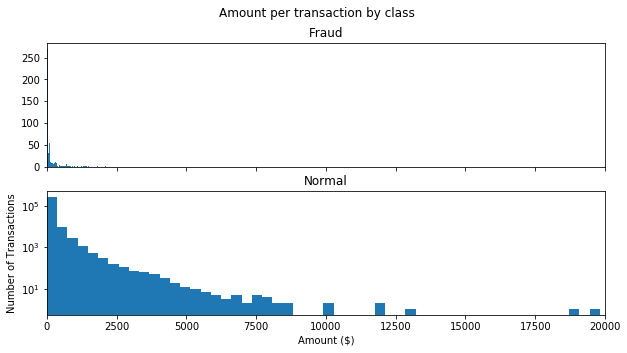

In [17]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,5))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = 70)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = 70 )
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

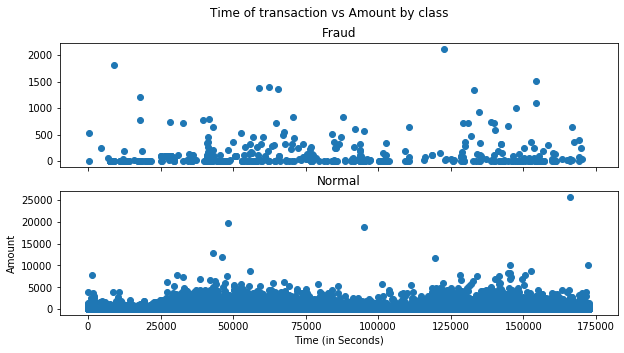

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,5))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

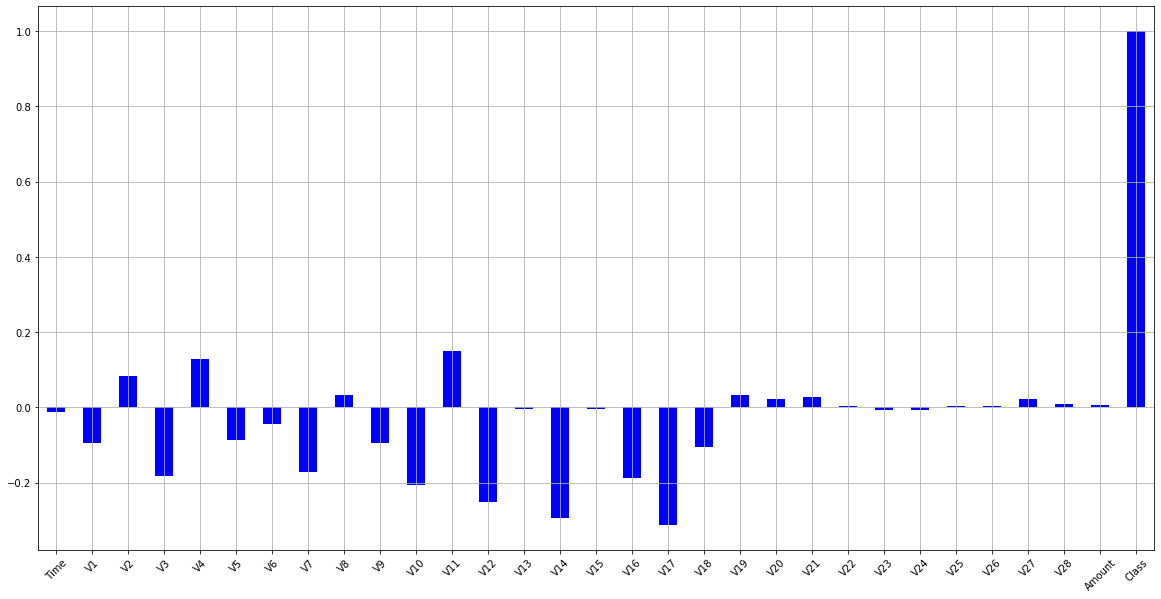

In [57]:
plt.figure(figsize=(20,10))
df.corrwith(df['Class']).plot.bar(color='b',grid=True,rot=45)

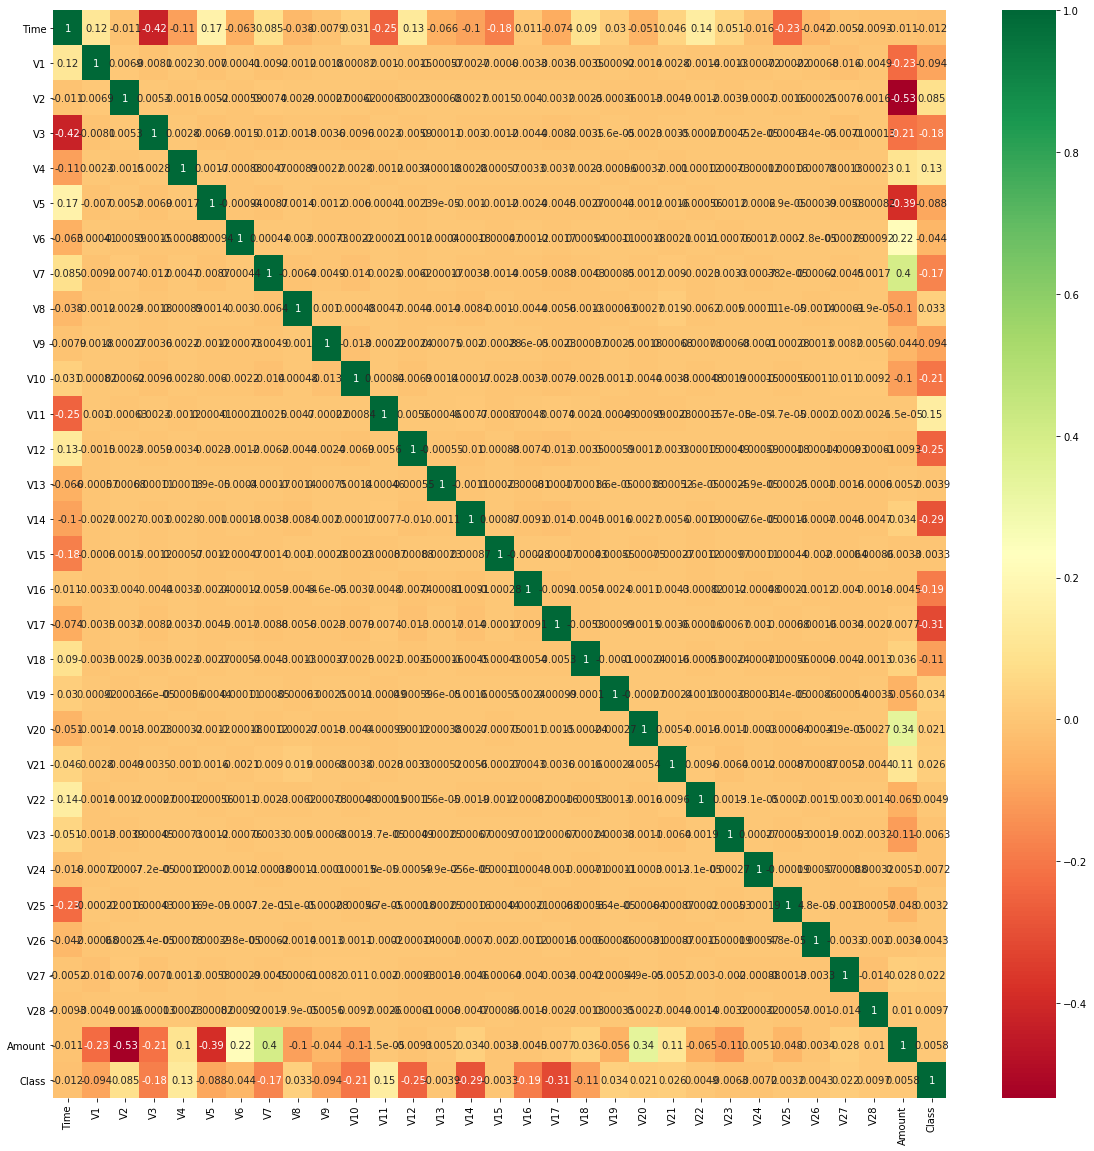

In [19]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Preprocessing the Data and triming 

In [30]:
df.shape

(283726, 31)

In [32]:
df1=df.sample(frac=0.1,random_state=1)

df1.shape

(28373, 31)

In [28]:
df1=df.sample(frac=0.1,random_state=1)

In [35]:
Fraud=df1[df1['Class']==1]

Valid=df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [36]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.001411781315074295
Fraud Cases : 40
Valid Cases : 28333


In [59]:
X=df1.drop('Class',axis=1)
y=df1['Class']
print(X.shape)
print(y.shape)

(28373, 30)
(28373,)


### Performing Classification Algorithms

### Logistic regression

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\refic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
prediction1=logmodel.predict(X_test)

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,prediction1))
print()
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8500
           1       0.69      0.75      0.72        12

    accuracy                           1.00      8512
   macro avg       0.85      0.87      0.86      8512
weighted avg       1.00      1.00      1.00      8512


[[8496    4]
 [   3    9]]


### K Nearest Neighbours (KNN) Classsifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=10)

In [94]:
knn.fit(X_train,y_train)
prediction2=knn.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,prediction2,digits=6))

print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0   0.998590  1.000000  0.999295      8500
           1   0.000000  0.000000  0.000000        12

    accuracy                       0.998590      8512
   macro avg   0.499295  0.500000  0.499647      8512
weighted avg   0.997182  0.998590  0.997886      8512

[[8500    0]
 [  12    0]]


C:\Users\refic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
prediction3=rfc.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,prediction3,digits=6))

print(confusion_matrix(y_test,pred_rfc))


              precision    recall  f1-score   support

           0   1.000000  0.999882  0.999941      8500
           1   0.923077  1.000000  0.960000        12

    accuracy                       0.999883      8512
   macro avg   0.961538  0.999941  0.979971      8512
weighted avg   0.999892  0.999883  0.999885      8512

[[8499    1]
 [   0   12]]


### SVM

In [80]:
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'rbf')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
prediction4=svc.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,prediction4,digits=6))

print(confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

           0   0.998590  1.000000  0.999295      8500
           1   0.000000  0.000000  0.000000        12

    accuracy                       0.998590      8512
   macro avg   0.499295  0.500000  0.499647      8512
weighted avg   0.997182  0.998590  0.997886      8512

[[8500    0]
 [  12    0]]


C:\Users\refic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB   
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
prediction5=nb.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,prediction5,digits=6))

print(confusion_matrix(y_test,pred_nb))

              precision    recall  f1-score   support

           0   1.000000  0.995882  0.997937      8500
           1   0.255319  1.000000  0.406780        12

    accuracy                       0.995888      8512
   macro avg   0.627660  0.997941  0.702358      8512
weighted avg   0.998950  0.995888  0.997104      8512

[[8465   35]
 [   0   12]]


### Now comparing the 5 classification algorithms used above

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,plot_precision_recall_curve
print('1-Logistic Regression:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction1))
print('\nClassification Report:\n',classification_report(y_test,prediction1,digits=6))

print('\n2-K Nearest Neighbours:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction2))
print('\nClassification Report:\n',classification_report(y_test,prediction2,digits=6))

print('\n3-Random Forest Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction3))
print('\nClassification Report:\n',classification_report(y_test,prediction3,digits=6))

print('\n5-Support Vector Machine:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction4))
print('\nClassification Report:\n',classification_report(y_test,prediction5,digits=6))

print('\n4-Naive Bayes Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction5))
print('\nClassification Report:\n',classification_report(y_test,prediction4,digits=6))

1-Logistic Regression:

Confusion Matrix:
 [[8496    4]
 [   3    9]]

Classification Report:
               precision    recall  f1-score   support

           0   0.999647  0.999529  0.999588      8500
           1   0.692308  0.750000  0.720000        12

    accuracy                       0.999178      8512
   macro avg   0.845977  0.874765  0.859794      8512
weighted avg   0.999214  0.999178  0.999194      8512


2-K Nearest Neighbours:

Confusion Matrix:
 [[8500    0]
 [  12    0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998590  1.000000  0.999295      8500
           1   0.000000  0.000000  0.000000        12

    accuracy                       0.998590      8512
   macro avg   0.499295  0.500000  0.499647      8512
weighted avg   0.997182  0.998590  0.997886      8512


3-Random Forest Classifier:

Confusion Matrix:
 [[8499    1]
 [   0   12]]

Classification Report:
               precision    recall  f1-score   support

#### From the above comparision you can see the accuracy for random forest is more then the rest of the algorithms and as the dataset is imbalnced we can do resampling on the dataset then we can perform classification algorithms which will provide more accuracy